## Task 1

### (a) Calculate w and b for the support vectors

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('svm_data.csv', sep=';')

In [15]:
alpha = np.array([0.0437, 0.2162, 0.1427, 0.3589, 0.0437])

In [24]:
support_vectors = data.loc[[0, 1, 3, 12, 13]]

In [131]:
X = support_vectors.drop(columns=['xi', 'yi'])
y = support_vectors[['yi']]

In [45]:
model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

In [47]:
print(f"The weight w is {model.coef_[0]}\nThe bias b is {model.intercept_[0]}")

The weight w is [0.83310345 0.3337931 ]
The bias b is -3.3333333333333335


### (b)   Coordinate systems

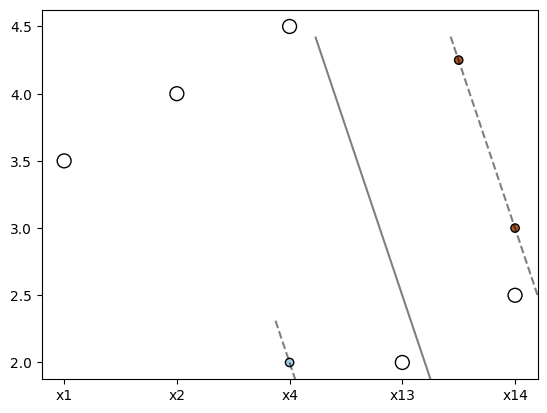

In [64]:
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=y.to_numpy(), cmap=plt.cm.Paired, marker='o', edgecolors='k')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
xy = np.c_[xx.ravel(), yy.ravel()]

# Plot decision function
Z = model.decision_function(xy).reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(support_vectors.to_numpy()[:, 0], support_vectors.to_numpy()[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.show()

### (c) Misclassified points

In [97]:
y_pred = model.predict(X)

In [98]:
comparison_result = np.all(np.array(y)==y_pred, axis=0)

In [99]:
comparison_result

True

Since the comparison result returns True, it means all values are correctly predicted, hence, no misclassified point.

# Task 2

### (a) Generate datasets

In [100]:
%run generator.py

In [101]:
data1 = data_generator(-0.1,0.7,100)
data2 = data_generator(0.1,2,100)
data3 = data_generator(0.75,-0.2,100)
data4 = data_generator(1,-1,100)

### (b) Create an SVM Formula

In [107]:
from scipy.optimize import minimize

In [135]:
class SVM_1:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Define the objective function for SVM
        def objective(params):
            w = params[:-1]
            b = params[-1]
            hinge_loss = np.maximum(1 - y * (np.dot(X, w) + b), 0)
            regularization_term = 0.5 * np.dot(w, w)  # Regularization term (L2 norm)
            return regularization_term + C * np.sum(hinge_loss)

        # Set up the constraints for the minimization
        constraints = ({'type': 'eq', 'fun': lambda params: np.dot(y, (np.dot(X, params[:-1]) + params[-1]))})

        # Initialize weights and bias
        initial_params = np.zeros(X.shape[1] + 1)

        # Set a high value for C (inverse of regularization strength)
        global C
        C = 1e6

        # Perform the minimization
        result = minimize(objective, initial_params, constraints=constraints)

        # Extract learned weights and bias
        self.weights = result.x[:-1]
        self.bias = result.x[-1]

    def predict(self, X):
        if self.weights is not None and self.bias is not None:
            return np.sign(np.dot(X, self.weights) + self.bias)
        else:
            raise ValueError("Model has not been trained yet.")